<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-5/blob/main/Homework_5_Problem_3_(12_feature).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5- problem 3(12 features)
# Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

In [ ]:
def linear_model(x, w, b):
    return x @ w + b

In [ ]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
def train (n_epochs, model, optimizer, parameters, x_train, y_train, x_val, y_val):
  train_rmse_list = []
  val_rmse_list = []
  for epoch in range(n_epochs+1):
    train_x_p=model(x_train,*parameters)
    train_loss=loss_fn(train_x_p,y_train)

    with torch.no_grad():
      val_x_p=model(x_val,*parameters)
      val_loss=loss_fn(val_x_p,y_val)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_rmse = torch.sqrt(train_loss).detach().item()
    train_rmse_list.append(train_rmse)
    val_rmse = torch.sqrt(val_loss).detach().item()
    val_rmse_list.append(val_rmse)

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training RMSE {train_rmse:.4f}, Validation RMSE {val_rmse:.4f}")

  return parameters,train_rmse_list, val_rmse_list

In [ ]:
file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:

def fur_map(x):
    return {'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1}.get(x, x)

housing['furnishingstatus'] = housing['furnishingstatus'].map(fur_map)

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
housing[varlist] = housing[varlist].apply(binary_map)


housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


In [ ]:
stander=StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus']
housing[num_vars] = stander.fit_transform(housing[num_vars])
Y=housing.pop("price")
X=housing
Y.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X = torch.tensor(X.values)
Y = torch.tensor(Y.values)
n_samples=X.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_X=X[train_indices]
train_Y=Y[train_indices]

val_X=X[val_indices]
val_Y=Y[val_indices]

train_X = train_X.float()
val_X = val_X.float()
train_Y = train_Y.float()
val_Y = val_Y.float()


Training with learning rate: 0.01
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1106803.0000, Validation RMSE 1111113.1250
Final parameters with learning rate 0.01: [tensor([ 472444.0625,  102587.2031,  503328.7188,  303637.3438, 1343337.5000,
         292246.3125,  519782.5000,  480196.4688,  955907.2500,  185766.8906,
         479230.2500,  150202.8125], requires_grad=True), tensor(2911106., requires_grad=True)]


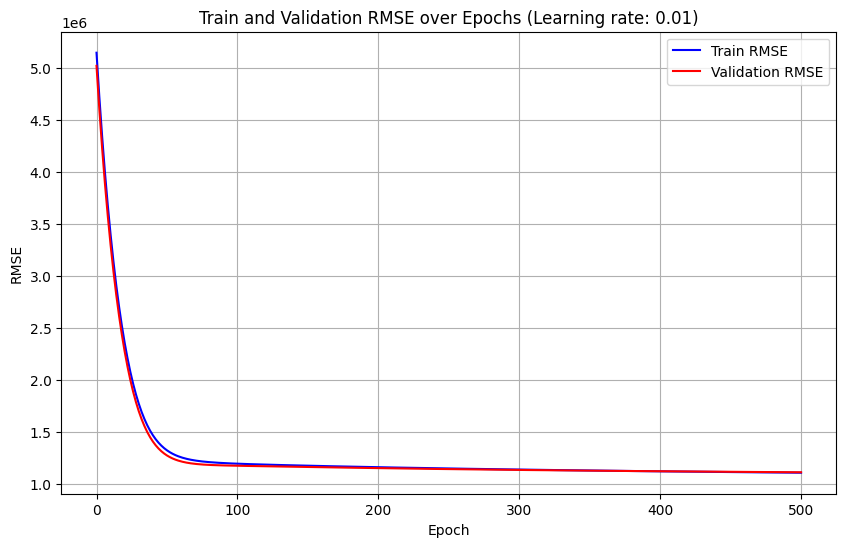

In [ ]:
#SGD Optimizer
learning_rates = [0.01]
number_of_epochs=500
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1054518.2500, Validation RMSE 1086578.5000
Epoch 1000, Training RMSE 1054515.2500, Validation RMSE 1086961.1250
Epoch 1500, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 2000, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 2500, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 3000, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 3500, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 4000, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 4500, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Epoch 5000, Training RMSE 1054515.2500, Validation RMSE 1086965.5000
Final parameters with learning rate 0.1: [tensor([ 571233.2500,   73537.0938,  479992.6562,  351013.9375,  420682.1875,
         272376.2188,  409203.5625, 1089941.6250,  907417.3125,  218803.3906,
         5432

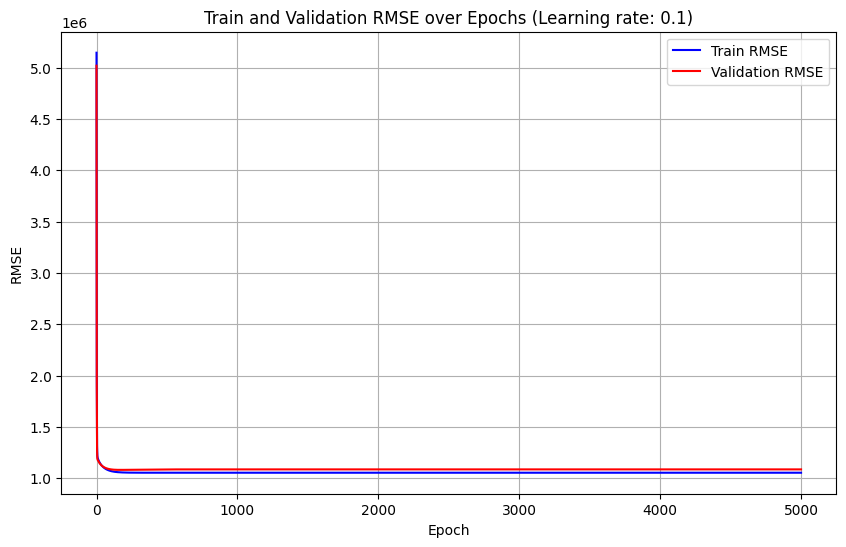


Training with learning rate: 0.01
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1106803.0000, Validation RMSE 1111113.1250
Epoch 1000, Training RMSE 1071643.6250, Validation RMSE 1087631.2500
Epoch 1500, Training RMSE 1060153.7500, Validation RMSE 1082469.3750
Epoch 2000, Training RMSE 1056380.3750, Validation RMSE 1082511.1250
Epoch 2500, Training RMSE 1055137.2500, Validation RMSE 1083630.5000
Epoch 3000, Training RMSE 1054724.8750, Validation RMSE 1084690.3750
Epoch 3500, Training RMSE 1054586.8750, Validation RMSE 1085472.3750
Epoch 4000, Training RMSE 1054540.0000, Validation RMSE 1086002.1250
Epoch 4500, Training RMSE 1054524.0000, Validation RMSE 1086348.5000
Epoch 5000, Training RMSE 1054518.3750, Validation RMSE 1086571.1250
Final parameters with learning rate 0.01: [tensor([ 570746.0625,   73791.5156,  480225.0938,  350709.4688,  425756.0000,
         272186.2188,  409677.2812, 1080497.1250,  907292.5625,  218718.4375,
         54

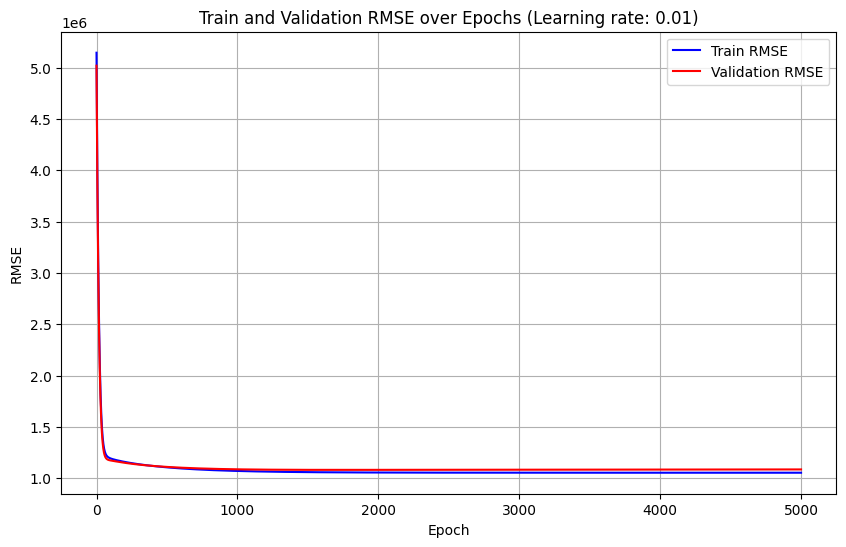


Training with learning rate: 0.001
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1331728.2500, Validation RMSE 1281444.2500
Epoch 1000, Training RMSE 1193885.5000, Validation RMSE 1173752.8750
Epoch 1500, Training RMSE 1174356.6250, Validation RMSE 1161889.0000
Epoch 2000, Training RMSE 1159887.3750, Validation RMSE 1150995.2500
Epoch 2500, Training RMSE 1147732.2500, Validation RMSE 1141628.1250
Epoch 3000, Training RMSE 1137274.8750, Validation RMSE 1133650.3750
Epoch 3500, Training RMSE 1128163.8750, Validation RMSE 1126791.5000
Epoch 4000, Training RMSE 1120162.5000, Validation RMSE 1120846.0000
Epoch 4500, Training RMSE 1113097.6250, Validation RMSE 1115663.2500
Epoch 5000, Training RMSE 1106836.0000, Validation RMSE 1111129.5000
Final parameters with learning rate 0.001: [tensor([ 472285.6250,  102607.3203,  503318.5312,  303652.8125, 1344513.7500,
         292485.4688,  520193.8750,  479545.3125,  955809.8750,  185732.9844,
         

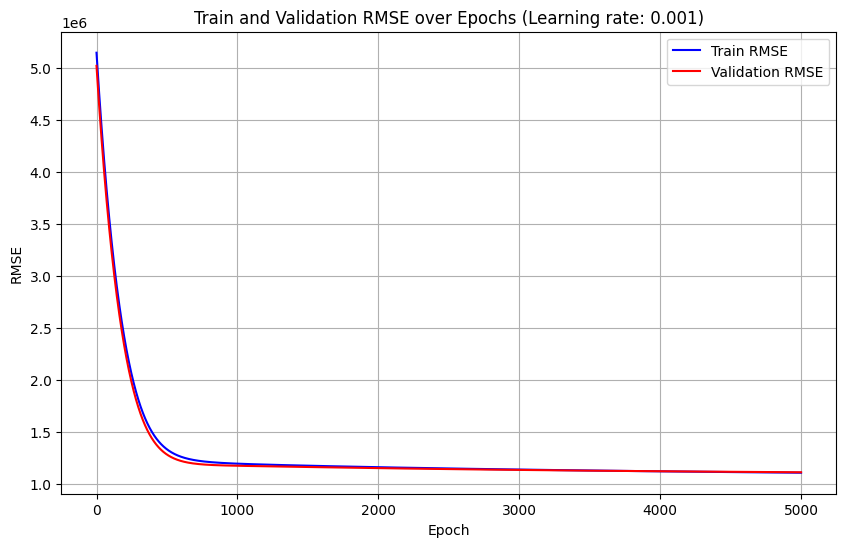


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 4180866.2500, Validation RMSE 4069813.5000
Epoch 1000, Training RMSE 3425797.5000, Validation RMSE 3326071.2500
Epoch 1500, Training RMSE 2839556.5000, Validation RMSE 2748430.5000
Epoch 2000, Training RMSE 2389828.0000, Validation RMSE 2305561.7500
Epoch 2500, Training RMSE 2050171.3750, Validation RMSE 1971834.1250
Epoch 3000, Training RMSE 1798443.3750, Validation RMSE 1725702.3750
Epoch 3500, Training RMSE 1615728.6250, Validation RMSE 1548588.1250
Epoch 4000, Training RMSE 1485827.8750, Validation RMSE 1424369.1250
Epoch 4500, Training RMSE 1395144.7500, Validation RMSE 1339338.6250
Epoch 5000, Training RMSE 1332698.8750, Validation RMSE 1282330.3750
Final parameters with learning rate 0.0001: [tensor([ 344660.6875,  200999.1094,  425106.6875,  264622.2188, 1692501.2500,
         406654.2500,  726376.6875,  140311.9688,  778476.1875,  200514.2031,
       

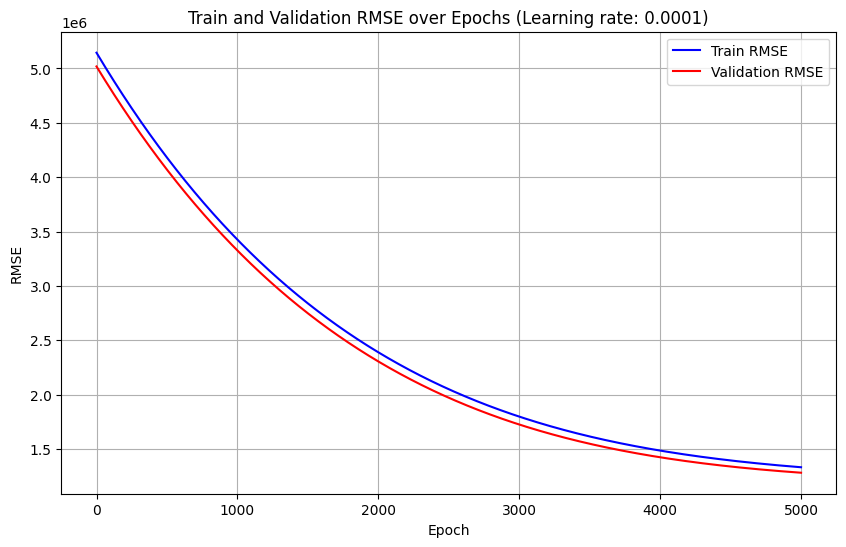

In [ ]:
#SGD Optimizer
learning_rates = [0.1, 0.01, 0.001, 0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.SGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.01
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1106832.7500, Validation RMSE 1111124.6250
Epoch 1000, Training RMSE 1071687.1250, Validation RMSE 1087642.6250
Epoch 1500, Training RMSE 1060191.6250, Validation RMSE 1082463.3750
Epoch 2000, Training RMSE 1056407.0000, Validation RMSE 1082485.1250
Epoch 2500, Training RMSE 1055154.2500, Validation RMSE 1083589.5000
Epoch 3000, Training RMSE 1054735.2500, Validation RMSE 1084639.3750
Epoch 3500, Training RMSE 1054593.0000, Validation RMSE 1085414.7500
Epoch 4000, Training RMSE 1054543.7500, Validation RMSE 1085940.1250
Epoch 4500, Training RMSE 1054526.1250, Validation RMSE 1086284.0000
Epoch 5000, Training RMSE 1054519.6250, Validation RMSE 1086505.8750
Final parameters with learning rate 0.01: [tensor([ 570582.4375,   73849.4609,  480246.0625,  350629.1562,  427155.4062,
         272205.3125,  409861.5938, 1079378.5000,  907326.5625,  218670.8125,
         54

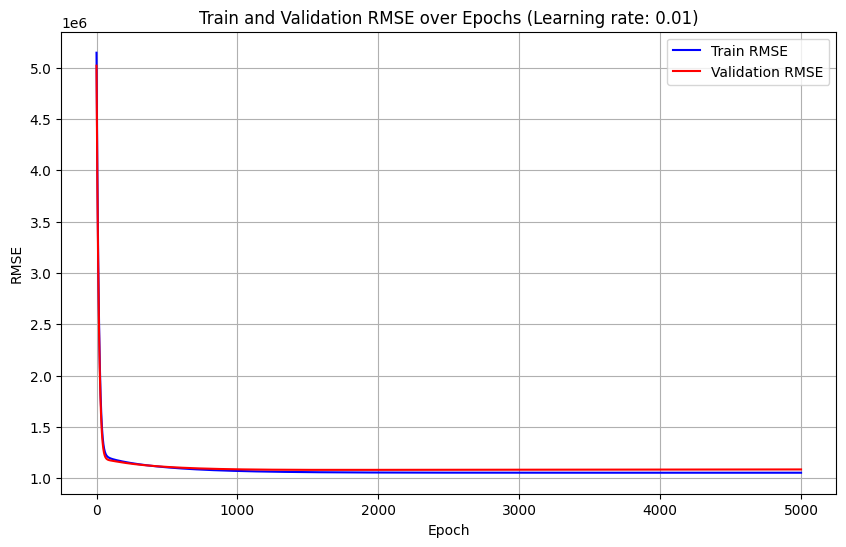

In [ ]:
#ASGD Optimizer
learning_rates = [0.01]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.ASGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()


Training with learning rate: 0.1
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1054519.5000, Validation RMSE 1086514.8750
Epoch 1000, Training RMSE 1054515.3750, Validation RMSE 1086896.8750
Epoch 1500, Training RMSE 1054515.2500, Validation RMSE 1086901.6250
Epoch 2000, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Epoch 2500, Training RMSE 1054515.2500, Validation RMSE 1086901.5000
Epoch 3000, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Epoch 3500, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Epoch 4000, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Epoch 4500, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Epoch 5000, Training RMSE 1054515.3750, Validation RMSE 1086901.6250
Final parameters with learning rate 0.1: [tensor([ 571070.4375,   73593.5312,  480013.2188,  350933.1250,  422054.7188,
         272399.9688,  409381.0938, 1088905.5000,  907462.1875,  218755.5938,
         5431

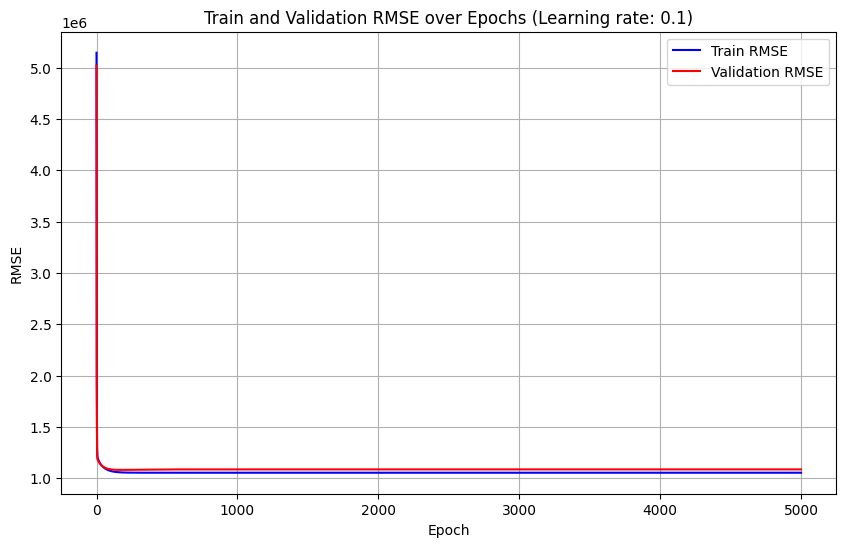


Training with learning rate: 0.01
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1106832.7500, Validation RMSE 1111124.6250
Epoch 1000, Training RMSE 1071687.1250, Validation RMSE 1087642.6250
Epoch 1500, Training RMSE 1060191.6250, Validation RMSE 1082463.3750
Epoch 2000, Training RMSE 1056407.0000, Validation RMSE 1082485.1250
Epoch 2500, Training RMSE 1055154.2500, Validation RMSE 1083589.5000
Epoch 3000, Training RMSE 1054735.2500, Validation RMSE 1084639.3750
Epoch 3500, Training RMSE 1054593.0000, Validation RMSE 1085414.7500
Epoch 4000, Training RMSE 1054543.7500, Validation RMSE 1085940.1250
Epoch 4500, Training RMSE 1054526.1250, Validation RMSE 1086284.0000
Epoch 5000, Training RMSE 1054519.6250, Validation RMSE 1086505.8750
Final parameters with learning rate 0.01: [tensor([ 570582.4375,   73849.4609,  480246.0625,  350629.1562,  427155.4062,
         272205.3125,  409861.5938, 1079378.5000,  907326.5625,  218670.8125,
         54

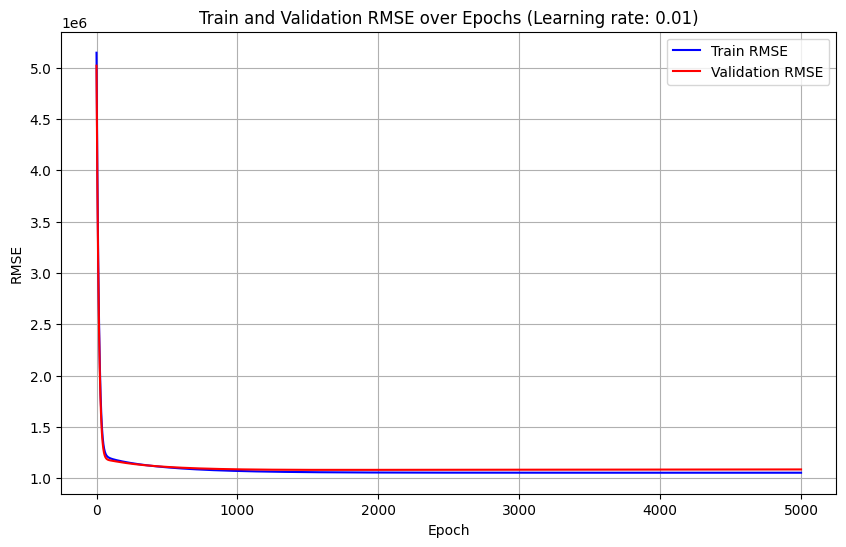


Training with learning rate: 0.001
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 1331775.0000, Validation RMSE 1281487.5000
Epoch 1000, Training RMSE 1193896.0000, Validation RMSE 1173755.8750
Epoch 1500, Training RMSE 1174362.3750, Validation RMSE 1161885.3750
Epoch 2000, Training RMSE 1159893.6250, Validation RMSE 1150990.3750
Epoch 2500, Training RMSE 1147739.7500, Validation RMSE 1141622.5000
Epoch 3000, Training RMSE 1137283.5000, Validation RMSE 1133644.3750
Epoch 3500, Training RMSE 1128176.3750, Validation RMSE 1126789.8750
Epoch 4000, Training RMSE 1120179.1250, Validation RMSE 1120846.6250
Epoch 4500, Training RMSE 1113117.8750, Validation RMSE 1115665.6250
Epoch 5000, Training RMSE 1106859.2500, Validation RMSE 1111133.1250
Final parameters with learning rate 0.001: [tensor([ 472245.0625,  102618.3125,  503297.9688,  303658.1562, 1344660.8750,
         292523.9062,  520260.2188,  479375.1250,  955706.3750,  185736.2500,
         

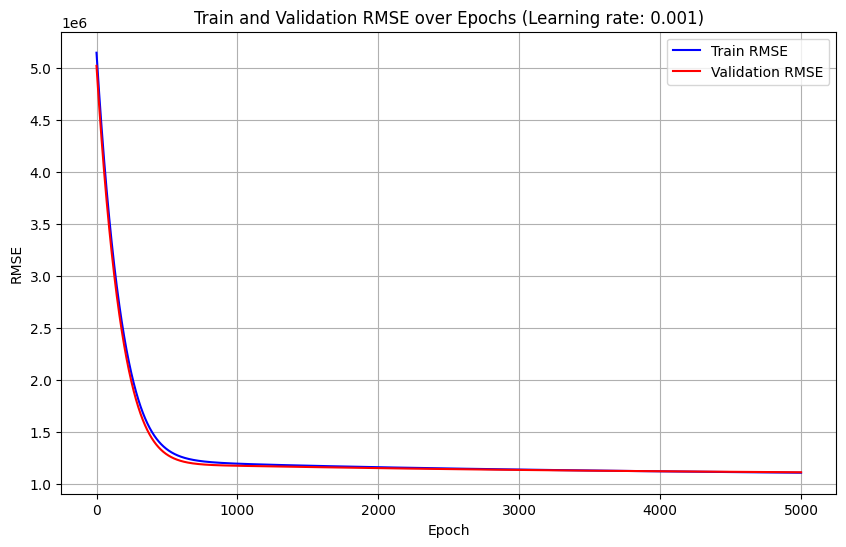


Training with learning rate: 0.0001
Epoch 0, Training RMSE 5144946.5000, Validation RMSE 5018676.0000
Epoch 500, Training RMSE 4180867.5000, Validation RMSE 4069814.7500
Epoch 1000, Training RMSE 3425803.0000, Validation RMSE 3326076.5000
Epoch 1500, Training RMSE 2839565.0000, Validation RMSE 2748439.0000
Epoch 2000, Training RMSE 2389839.5000, Validation RMSE 2305573.0000
Epoch 2500, Training RMSE 2050184.3750, Validation RMSE 1971847.1250
Epoch 3000, Training RMSE 1798457.6250, Validation RMSE 1725716.2500
Epoch 3500, Training RMSE 1615742.6250, Validation RMSE 1548601.5000
Epoch 4000, Training RMSE 1485840.6250, Validation RMSE 1424381.2500
Epoch 4500, Training RMSE 1395156.0000, Validation RMSE 1339349.0000
Epoch 5000, Training RMSE 1332708.5000, Validation RMSE 1282339.0000
Final parameters with learning rate 0.0001: [tensor([ 344659.2500,  200999.8281,  425104.8438,  264621.0000, 1692493.3750,
         406652.6250,  726373.8125,  140310.6250,  778471.8750,  200513.9375,
       

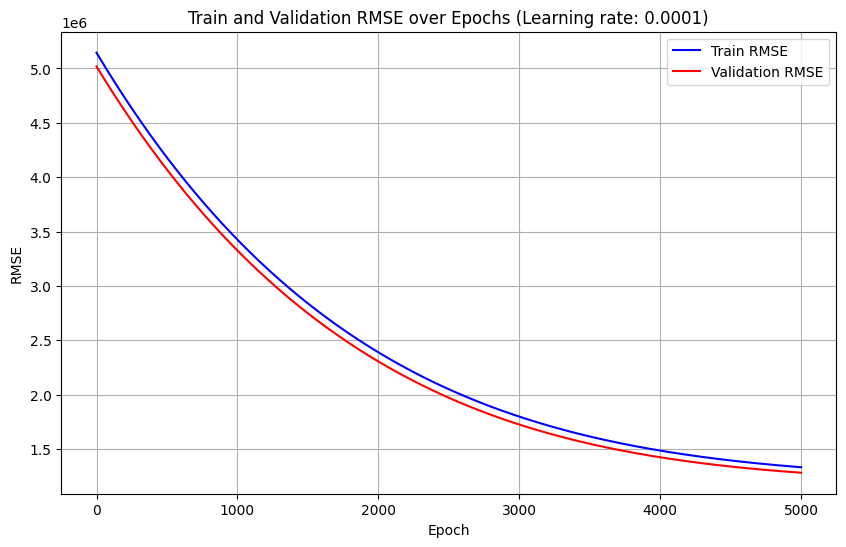

In [ ]:
#ASGD Optimizer
learning_rates = [0.1, 0.01, 0.001, 0.0001]
number_of_epochs=5000
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  w = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,1.0], requires_grad=True)
  b = torch.tensor(0.0, requires_grad=True)
  optimizer=optim.ASGD([w, b], lr=learning_rate)
  trained_parameters, train_rmse, val_rmse=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=[w,b],
      x_train=train_X,
      y_train=train_Y,
      x_val=val_X,
      y_val=val_Y
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_rmse, label='Train RMSE', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_rmse, label='Validation RMSE', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.title(f'Train and Validation RMSE over Epochs (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()